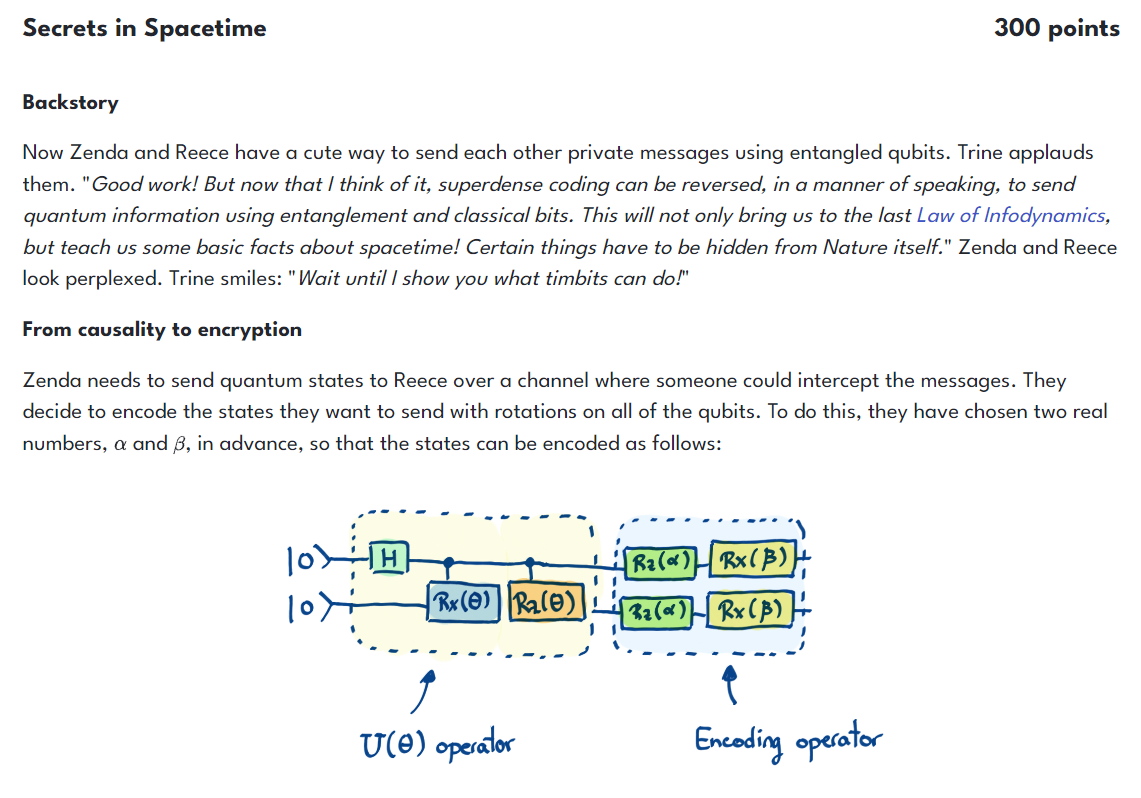

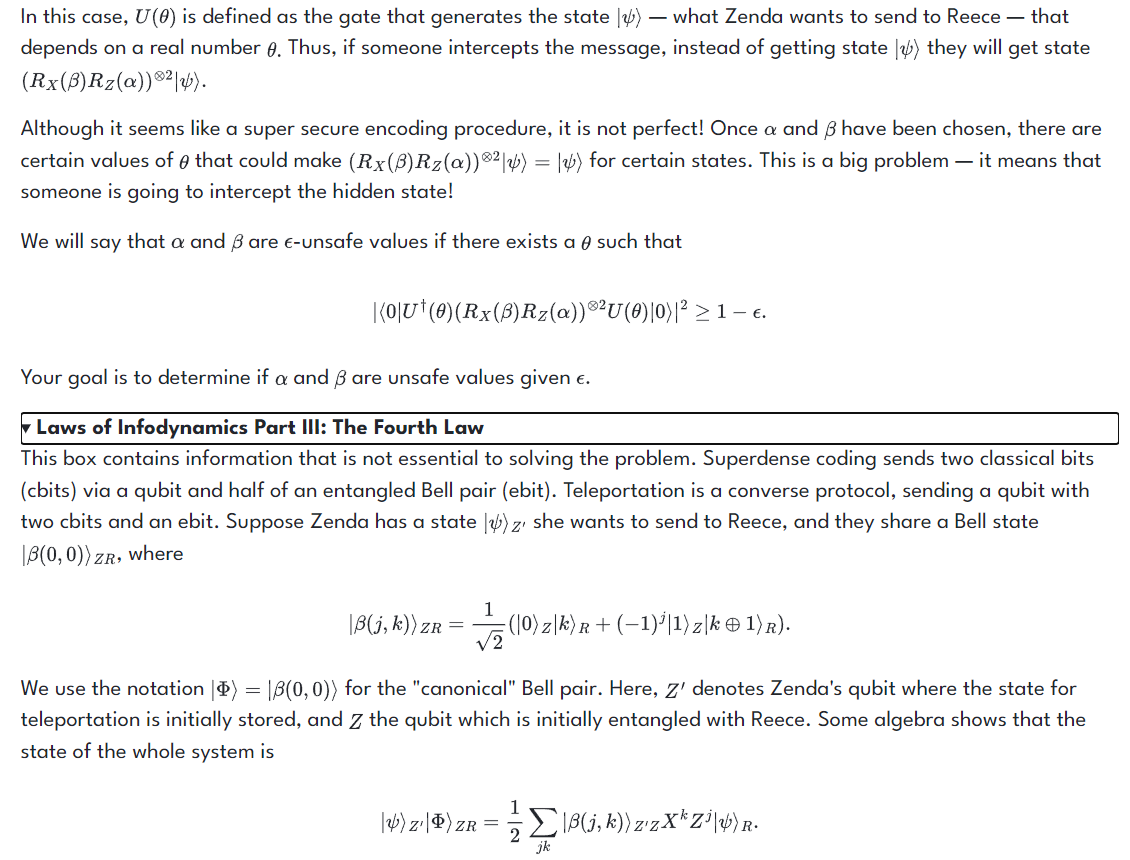

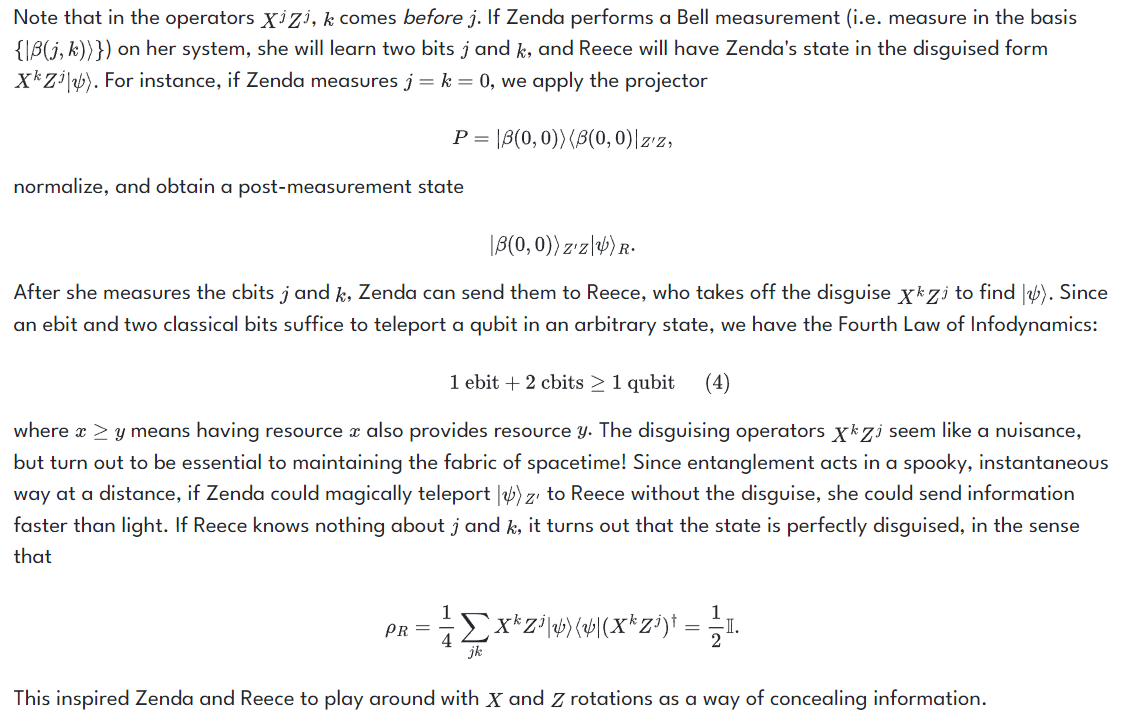

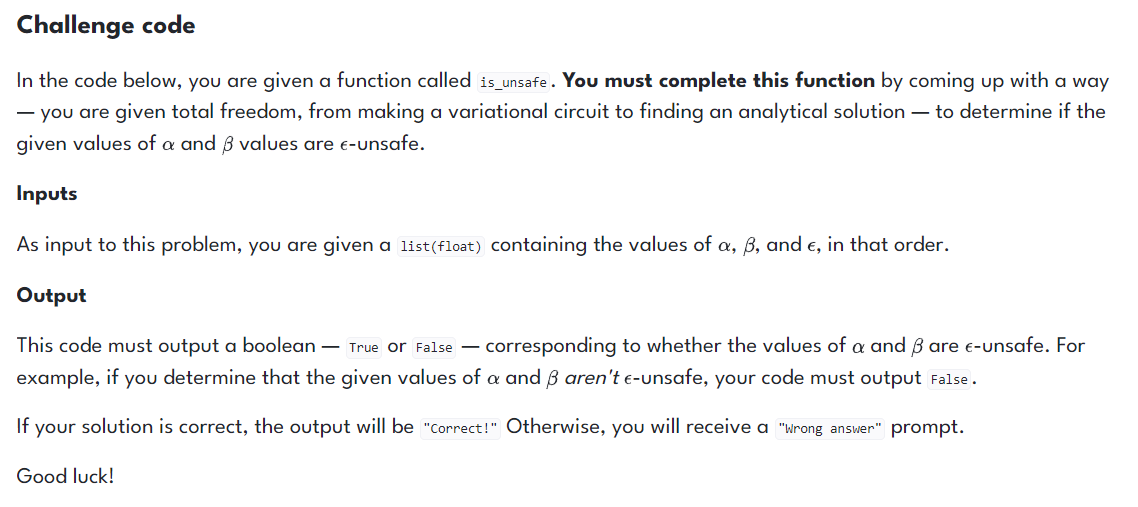

In [3]:
import json
import pennylane as qml
import pennylane.numpy as np

def U_psi(theta):
    """
    Quantum function that generates |psi>, Zenda's state wants to send to Reece.

    Args:
        theta (float): Parameter that generates the state.

    """
    qml.Hadamard(wires = 0)
    qml.CRX(theta, wires = [0,1])
    qml.CRZ(theta, wires = [0,1])

def is_unsafe(alpha, beta, epsilon):
    """
    Boolean function that we will use to know if a set of parameters is unsafe.

    Args:
        alpha (float): parameter used to encode the state.
        beta (float): parameter used to encode the state.
        epsilon (float): unsafe-tolerance.

    Returns:
        (bool): 'True' if alpha and beta are epsilon-unsafe coefficients. 'False' in the other case.

    """

    # Put your code here #
    dev = qml.device('default.qubit', wires = 2)
    @qml.qnode(dev)
    def calculate(theta):
        #print(f'theta:{theta}')
        U_psi(theta)
        qml.RZ(alpha, wires=0)
        qml.RZ(alpha, wires=1)
        qml.RX(beta, wires=0)
        qml.RX(beta, wires=1)
        qml.adjoint(U_psi)(theta)
        return [qml.expval(qml.PauliZ(i)) for i in range(2)]#qml.probs(wires=[0,1])
    
    def cost(result):
        #do post
        results = 0
        for i in result:
            results += i**2
        return results/2
            
    steps = 36000
    maxcost = 0
    optimal_theta = 0
    
    for i in range(steps):
        # update the circuit parameters after each step relative to cost & params
        tempresult = calculate((np.pi)*(i/36000))
        tempcost = cost(tempresult)
        if tempcost > maxcost:
            maxcost = tempcost
            optimal_theta = (np.pi)*(i/36000)
            
            
    compare = 1 - epsilon
    print(f'maxcost: {maxcost} -- threshold: {compare} -- angle: {optimal_theta}')
    if maxcost > compare:
          return True
    else:
          return False
    
    ######################


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    output = is_unsafe(*ins)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    
    def bool_to_int(string):
        if string == "True":
            return 1
        return 0

    solution_output = bool_to_int(solution_output)
    expected_output = bool_to_int(expected_output)
    assert solution_output == expected_output, "The solution is not correct."


test_cases = [['[0.1, 0.2, 0.3]', 'True'], ['[1.1, 1.2, 0.3]', 'False'], ['[1.1, 1.2, 0.4]', 'True'], ['[0.5, 1.9, 0.7]', 'True']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.1, 0.2, 0.3]'...
maxcost: 0.9763915110600154 -- threshold: 0.7 -- angle: 0.4831944034146301
Correct!
Running test case 1 with input '[1.1, 1.2, 0.3]'...
maxcost: 0.6538426359247226 -- threshold: 0.7 -- angle: 3.1415053871271934
Correct!
Running test case 2 with input '[1.1, 1.2, 0.4]'...
maxcost: 0.6538426359247226 -- threshold: 0.6 -- angle: 3.1415053871271934
Correct!
Running test case 3 with input '[0.5, 1.9, 0.7]'...
maxcost: 0.4586218780592011 -- threshold: 0.30000000000000004 -- angle: 0.16763887465405533
Correct!
